<a href="https://colab.research.google.com/github/R0M117/RomNotebook/blob/main/Romero_Musadat__Analyzing_Historical_Stock_Revenue_Data_and_Building_a_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library For Webscrapping

In [1]:
import requests
from bs4 import BeautifulSoup
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Tesla Dataset

## Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [2]:
tesla_stock = yf.Ticker("TSLA")
tesla_data = tesla_stock.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.to_csv('tesla_stock_data.csv', index=False)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points

In [3]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [4]:
response  = requests.get(url).text


In [5]:
soup = BeautifulSoup(response, 'html.parser')


In [6]:
tables = soup.find_all('table')
tesla_revenue = pd.read_html(str(tables))[1]
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)
tesla_revenue.head()

<ipython-input-6-ee71310e6491>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(tables))[1]


,Date,Revenue
0,2022-09-30,21454.0
1,2022-06-30,16934.0
2,2022-03-31,18756.0
3,2021-12-31,17719.0
4,2021-09-30,13757.0


In [7]:
tesla_revenue.isna().sum()

,0
Date,0
Revenue,1


# Game Stop

## Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points

In [8]:
gamestop_stock = yf.Ticker("GME")
gme_data = gamestop_stock.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.to_csv('gamestop_stock_data.csv', index=False)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points

In [9]:
url2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [10]:
data2  = requests.get(url2).text


In [11]:
soup2 = BeautifulSoup(data2, 'html.parser')


In [12]:
tables = soup2.find_all('table')
gamestop_revenue = pd.read_html(str(tables))[1]
gamestop_revenue.columns = ['Date', 'Revenue']
gamestop_revenue['Revenue'] = gamestop_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)
gamestop_revenue.head()

<ipython-input-12-f9fd3f6bf35d>:2: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gamestop_revenue = pd.read_html(str(tables))[1]


,Date,Revenue
0,2020-04-30,1021.0
1,2020-01-31,2194.0
2,2019-10-31,1439.0
3,2019-07-31,1286.0
4,2019-04-30,1548.0


In [13]:
gamestop_revenue.isna().sum()

,0
Date,0
Revenue,0


## Question 5 - Tesla Stock and Revenue Dashboard - 2 Points

In [65]:
def make_graph(data, title, x_label, y_label):
    plt.figure(figsize=(20, 6))
    plt.plot(data['Date'], data.iloc[:, 1], marker='.')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


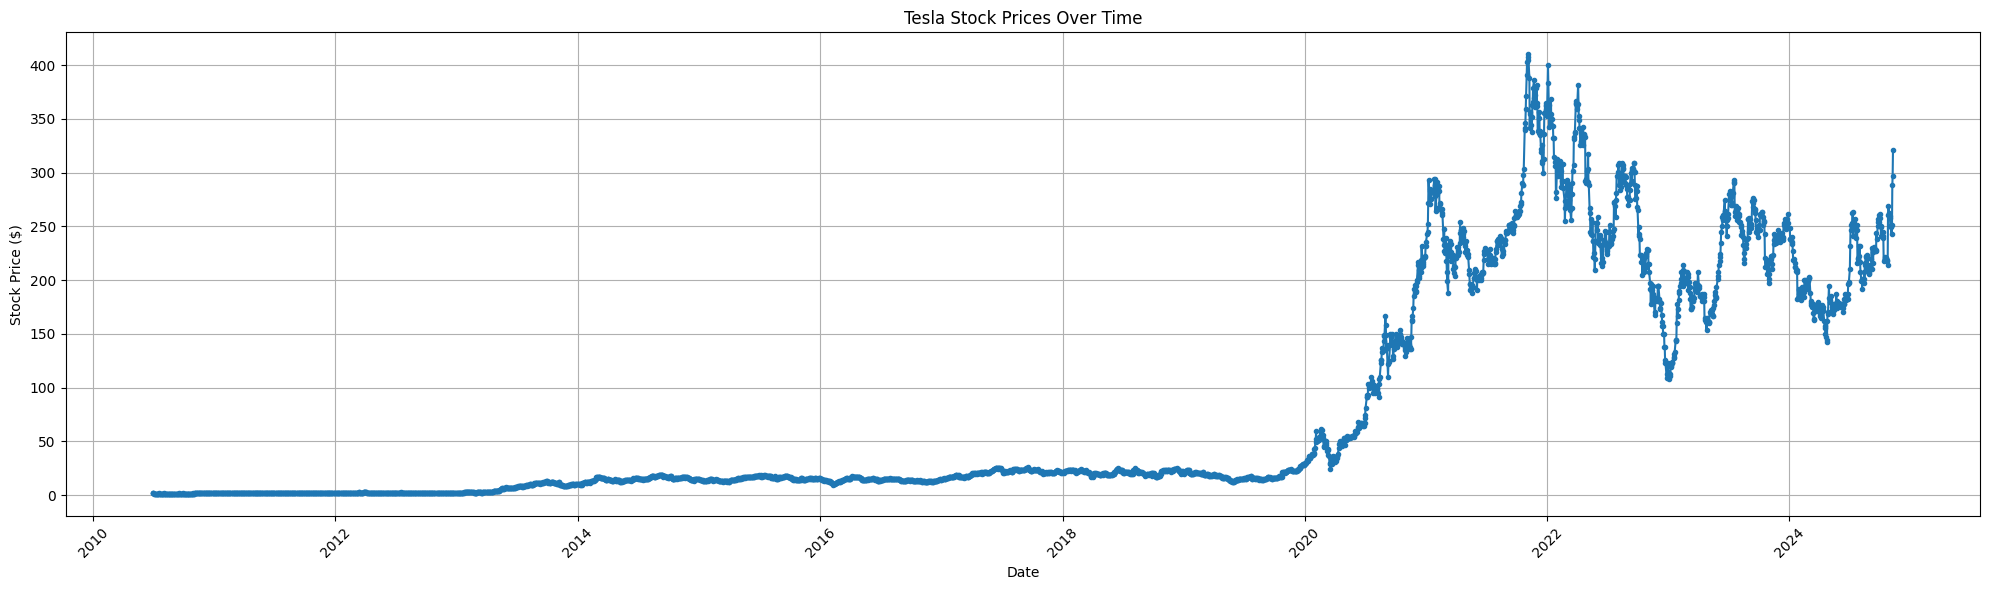

In [66]:
make_graph(tesla_data[['Date', 'Close']], title='Tesla Stock Prices Over Time', x_label='Date', y_label='Stock Price ($)')

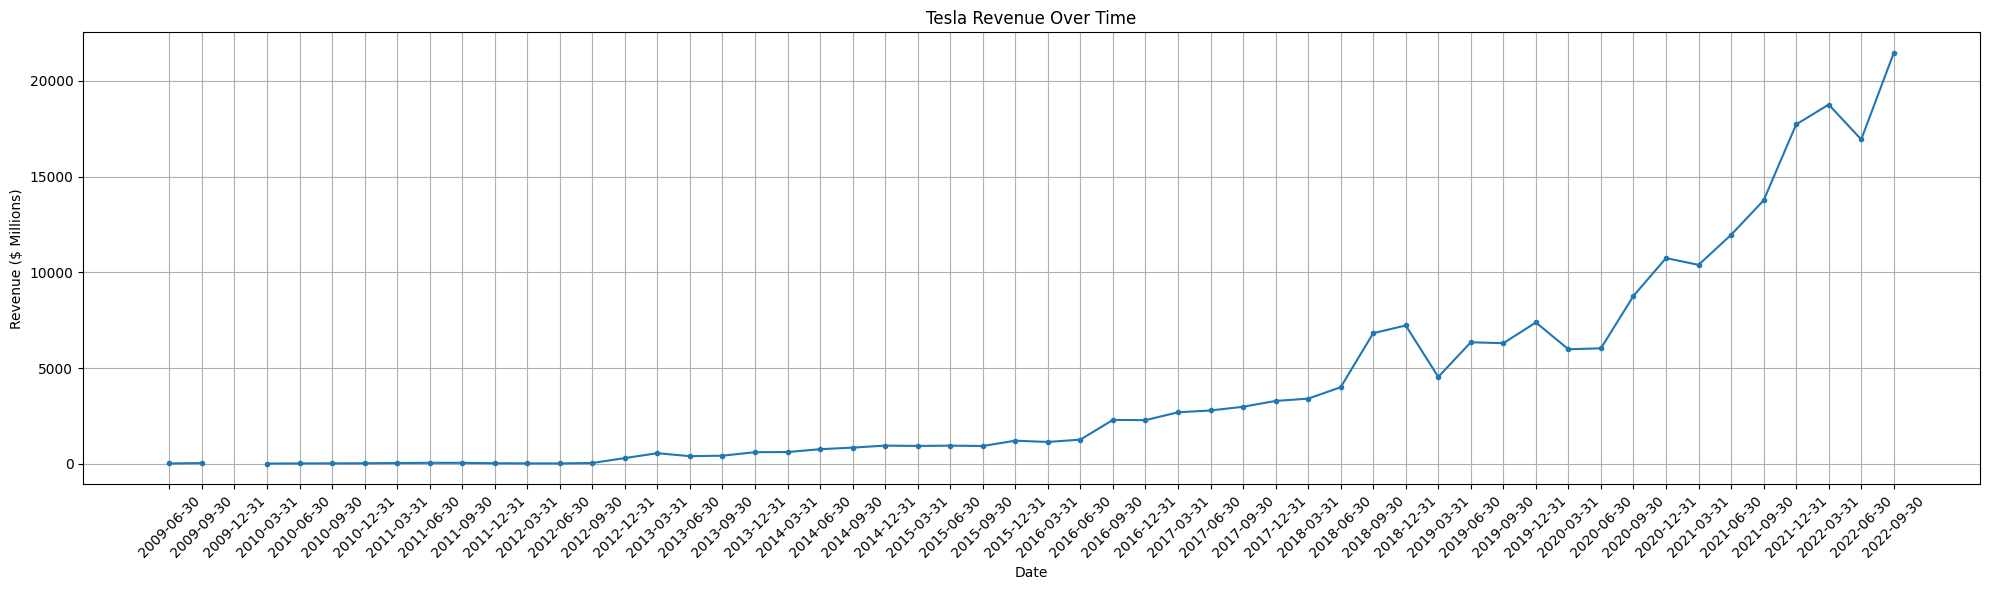

In [67]:
gamestop_revenue.sort_values(by='Date', inplace=True)
make_graph( tesla_revenue, title='Tesla Revenue Over Time', x_label='Date', y_label='Revenue ($ Millions)' )

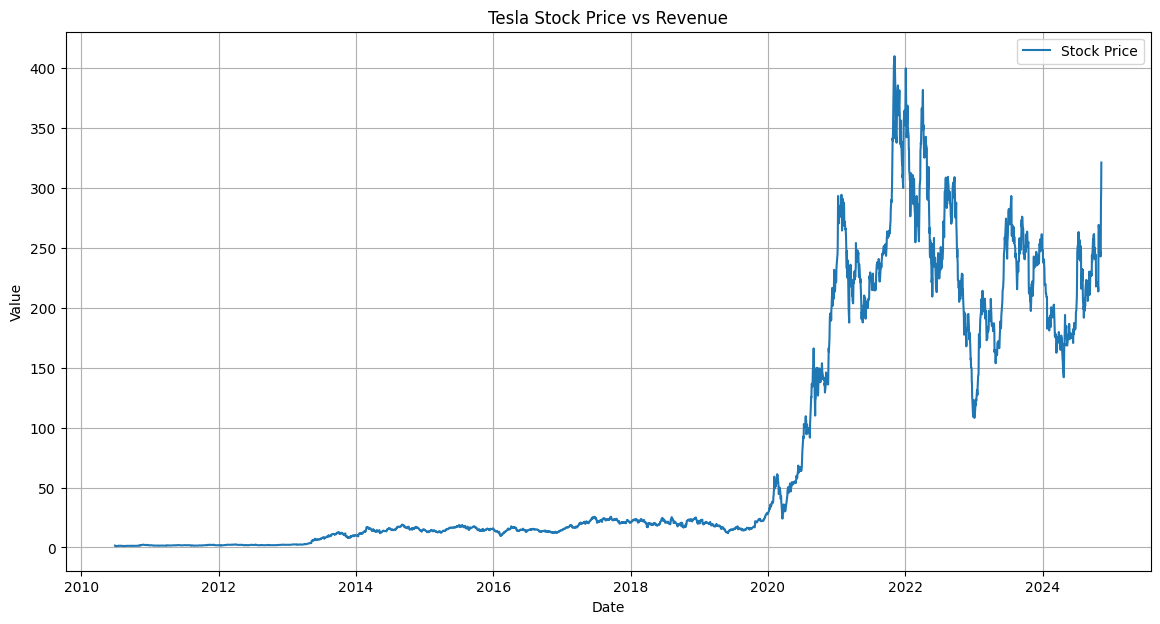

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(tesla_data['Date'], tesla_data['Close'], label='Stock Price')
plt.title('Tesla Stock Price vs Revenue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Question 6 - GameStop Stock and Revenue Dashboard- 2 Points


In [78]:
def make_graph(data, title, x_label, y_label):
    plt.figure(figsize=(20, 6))
    plt.plot(data['Date'], data.iloc[:, 1], marker='.')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


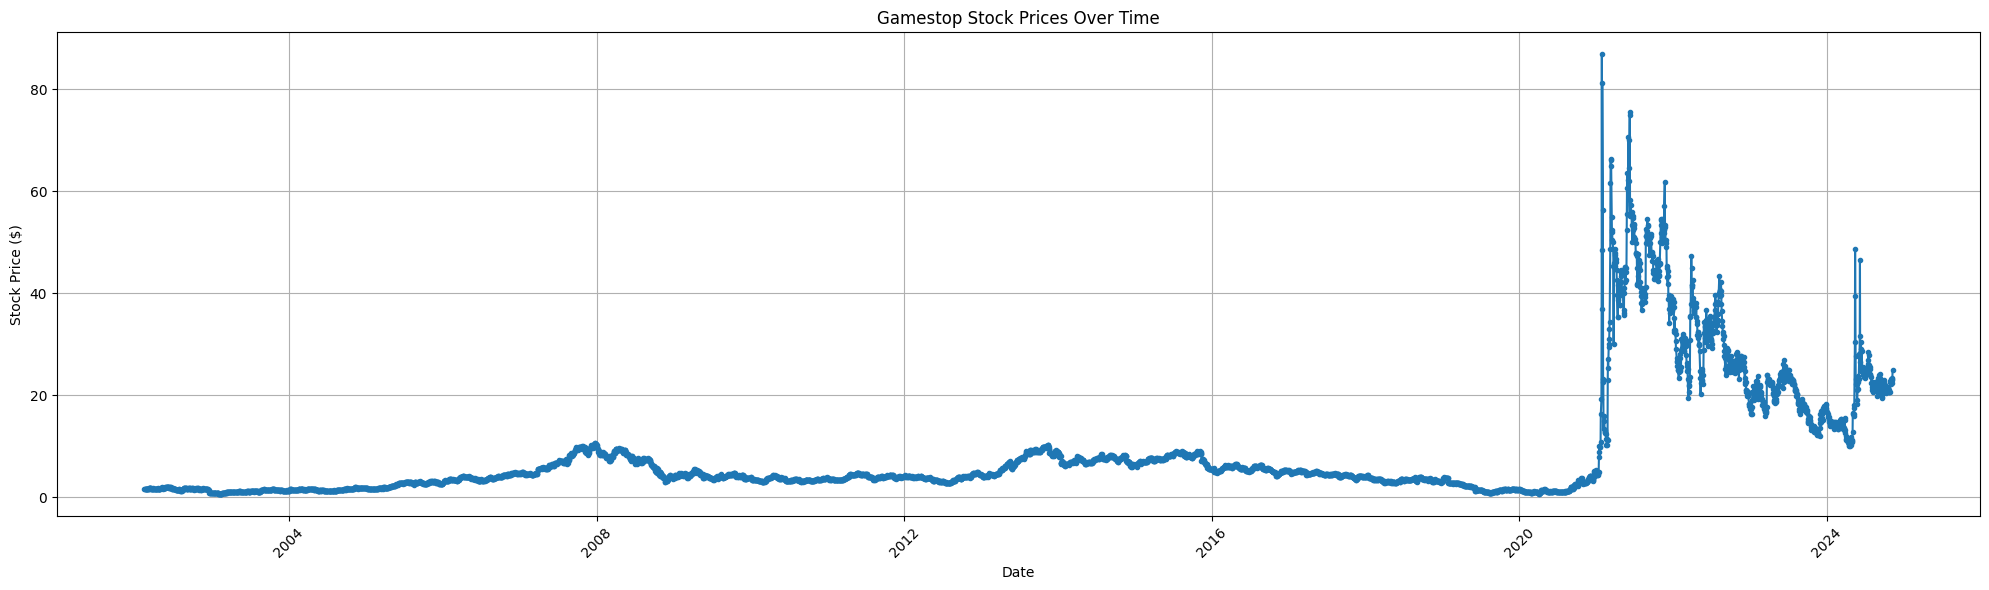

In [79]:
make_graph(gme_data[['Date', 'Close']], title='Gamestop Stock Prices Over Time', x_label='Date', y_label='Stock Price ($)')

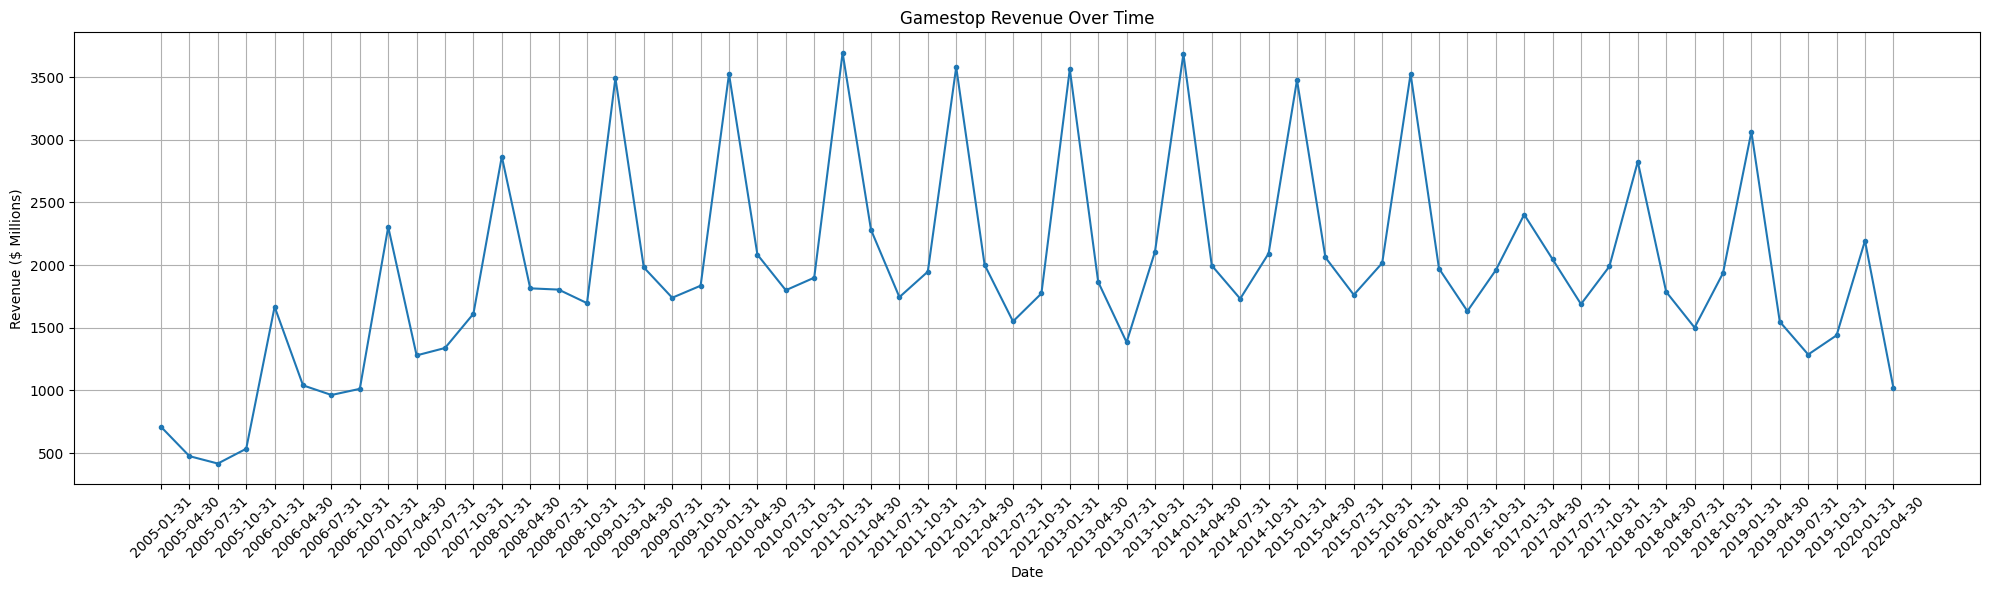

In [80]:
gamestop_revenue.sort_values(by='Date', inplace=True)
make_graph(gamestop_revenue, title='Gamestop Revenue Over Time', x_label='Date', y_label='Revenue ($ Millions)')

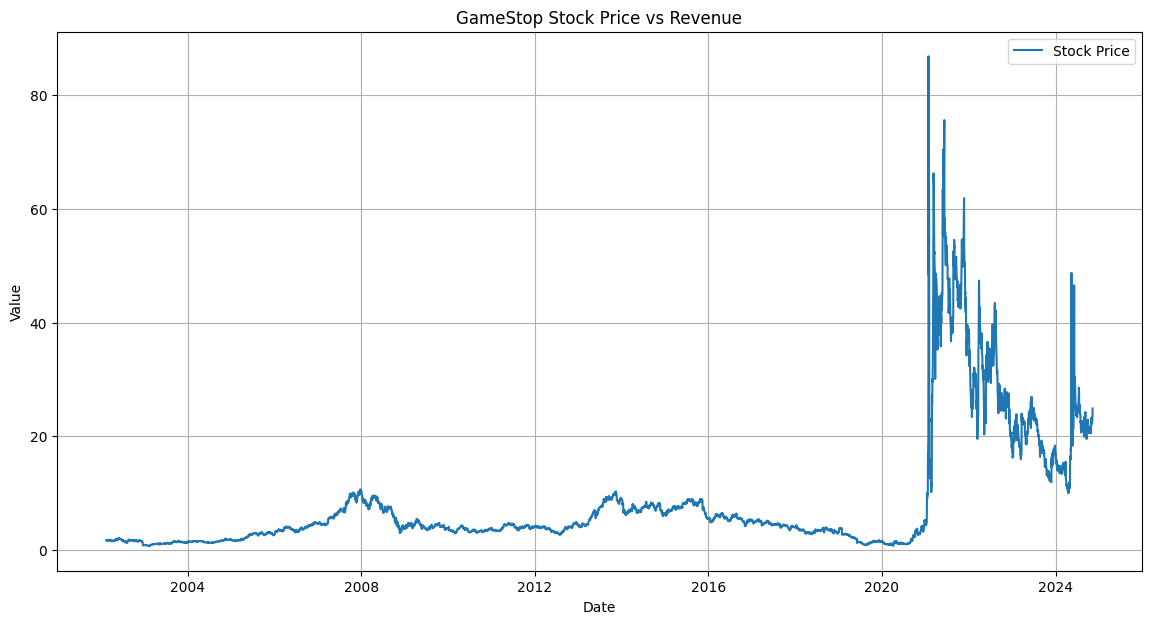

In [81]:
# Plotting GameStop Stock vs Revenue
plt.figure(figsize=(14, 7))
plt.plot(gme_data['Date'], gme_data['Close'], label='Stock Price')
plt.title('GameStop Stock Price vs Revenue')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

## Question 7 - Sharing your Assignment Notebook - 2 Points
